In [246]:
#dataset from kaggle
#https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil/data
#when the .csv file doesn't open corrently, import it into a new worksheet (from file)

import sys
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults() 
import numpy as np

In [247]:
data = pd.read_csv("forest.csv", thousands = '.', encoding='latin-1',sep=';')
#"sep" gets rid of KeyError
#"encoding" gets rid of UnicodeDecodeError
#I also had to edit the csv file to change to format of cells to be "numbers" not "general"
#and get rid of decimel numbers
#it is also important to specify thousands as "."

In [248]:
data.shape

(6454, 5)

In [249]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1011998
1,1999,Acre,Janeiro,0,1011999
2,2000,Acre,Janeiro,0,1012000
3,2001,Acre,Janeiro,0,1012001
4,2002,Acre,Janeiro,0,1012002


In [250]:
data.describe(include= "all")
#summary

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6.454000e+03
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Janeiro,NaN,NaN
freq,NaN,717,541,NaN,NaN
mean,2007.461729,NaN,NaN,881.219399,1.012007e+06
std,5.746654,NaN,NaN,3857.593866,5.746654e+00
min,1998.000000,NaN,NaN,0.000000,1.011998e+06
25%,2002.000000,NaN,NaN,9.000000,1.012002e+06
50%,2007.000000,NaN,NaN,55.000000,1.012007e+06
75%,2012.000000,NaN,NaN,283.000000,1.012012e+06


In [251]:
data.isna().sum()
#missing data?

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [252]:
data = data.replace(0, np.nan)
data2 = data.dropna(subset=['number'])
data2.describe(include= "all")
#removing values 0

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5.837000e+03
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Outubro,NaN,NaN
freq,NaN,661,534,NaN,NaN
mean,2007.834847,NaN,NaN,974.368683,1.012008e+06
std,5.649076,NaN,NaN,4045.185011,5.649076e+00
min,1998.000000,NaN,NaN,1.000000,1.011998e+06
25%,2003.000000,NaN,NaN,16.000000,1.012003e+06
50%,2008.000000,NaN,NaN,73.000000,1.012008e+06
75%,2013.000000,NaN,NaN,360.000000,1.012013e+06


In [253]:
forest_fire_per_month = data2.groupby('month')['number'].sum()
#grouping data by month and summing up the numbers

In [254]:
print(forest_fire_per_month)

month
Abril          56313.0
Agosto       1169492.0
Dezembro      344203.0
Fevereiro      75164.0
Janeiro        52587.0
Julho         388591.0
Junho         164852.0
Maio           46083.0
Março          35118.0
Novembro      658681.0
Outubro       997686.0
Setembro     1698620.0
Name: number, dtype: float64


In [255]:
print(type(forest_fire_per_month))
#series

<class 'pandas.core.series.Series'>


In [256]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [257]:
print(type(forest_fire_per_month))
#data frame

<class 'pandas.core.frame.DataFrame'>


In [258]:
forest_fire_per_month.head()

,number
month,
Abril,56313.0
Agosto,1169492.0
Dezembro,344203.0
Fevereiro,75164.0
Janeiro,52587.0


In [259]:
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0)
#getting rid of alphabetical order of months

In [260]:
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month.head()

,month,number
0,Janeiro,52587.0
1,Fevereiro,75164.0
2,Março,35118.0
3,Abril,56313.0
4,Maio,46083.0


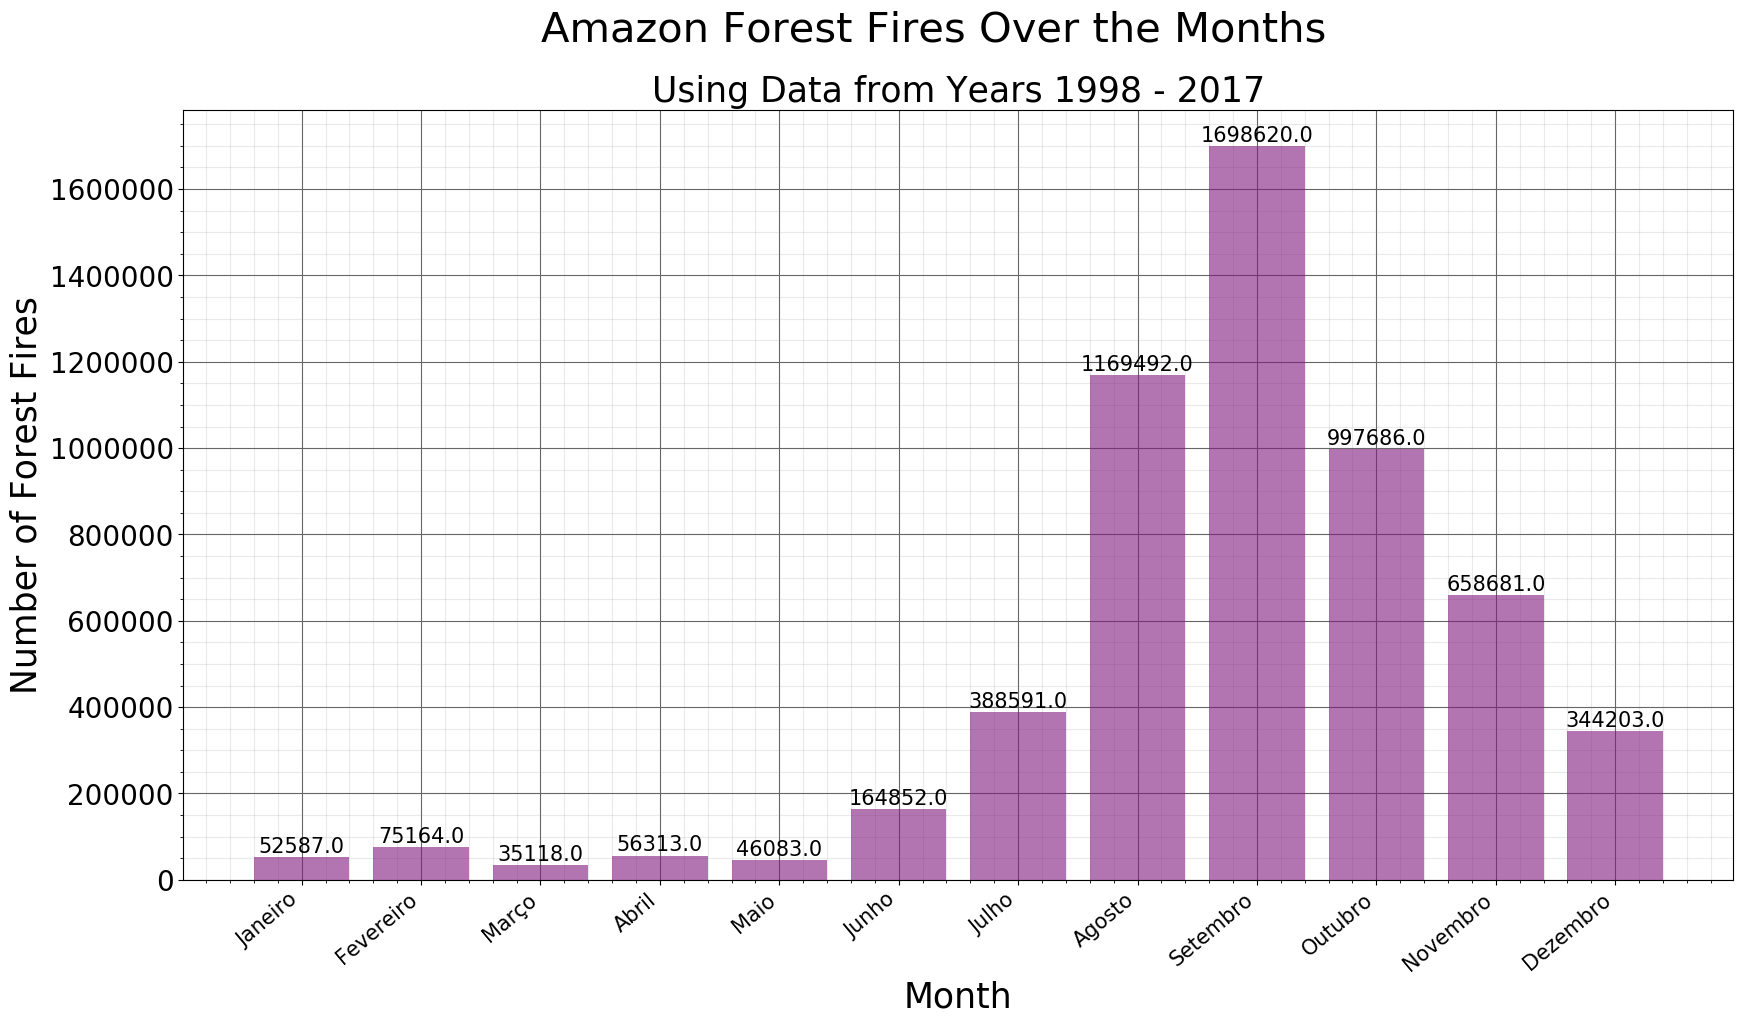

In [277]:
plt.figure(figsize=(20, 10)) 
#specify width and height #plt.bar(x-values, y-values) 

plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 

plt.suptitle('Amazon Forest Fires Over the Months', fontsize=30) 
plt.title('Using Data from Years 1998 - 2017', fontsize=25)  
plt.xlabel('Month', fontsize=25) 
plt.ylabel('Number of Forest Fires', fontsize=25)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.setp(plt.gca().get_xticklabels(),
         rotation=40,
         horizontalalignment='right',
         fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)

for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15) 

plt.show()